# 크롤링한 review data 가져오기

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np

df = pd.read_csv("output2.csv")

In [2]:
df

,Unnamed: 0,type,category,review,star
0,1,에어팟 1세대,음질,2세대로 배송 받았고 철가루랑 하얀색 실리콘케이스도 잘 받았습니다 역시 사용해보니 ...,5
1,2,에어팟 1세대,음질,"배송은 4시 이전 주문 당일 발송으로 다음날 바로 받았구요, 바로 정품 등록했는데 ...",5
2,3,에어팟 1세대,음질,아이폰과 아이패드를 둘 다 사용하고 있는데 아이폰에서 음악을 듣거나 영상을 보다 아...,5
3,4,에어팟 1세대,음질,다른 저렴한 곳도 있었습니다.\n\n그래도 제조일자 최신에 페이백으로 다시 받는 금...,4
4,5,에어팟 1세대,음질,택배도 하루일찍오고 하자 하나도 없고 깔끔했어요 뽁뽁이로 포장도 해주셔서 너무 감사...,5
...,...,...,...,...,...
5555,5556,에어팟 2세대(유선),휴대성,진작 살껄 휴대성부터 음질 모든게 너무 만족스러워요!!,5
5556,5557,에어팟 2세대(유선),휴대성,"무선인게 너무 ？？아요.. 휴대 간편하고, 이게 정말 활용적인가 고민하고 삿네요.....",5
5557,5558,에어팟 2세대(유선),휴대성,선이라서 휴대하기 좋구요..귀에 꼽히는거라...아무래도 뛰거나 빨리움직이면 빠지기도...,5
5558,5559,에어팟 2세대(유선),휴대성,음질도 블루투스로 연결된거라고는 믿기지 않을정도로 너무 이쁘고 한손에 착 감겨서 휴...,5


p.s)
크롤링후, csv저장파일이 깨져서 출력된다면 메모장으로 연결하여 ANSCII로 encodeing을 다시하여 csv로 저장한다.

csv를 df로 호출했을때 encoding에러가난다면, 메모장으로 연결하여 utf-8로 encoding을 다시하여 df를 출력한다.

In [3]:
#불필요한 열 제거
df.drop(df.columns[0],axis='columns')

,type,category,review,star
0,에어팟 1세대,음질,2세대로 배송 받았고 철가루랑 하얀색 실리콘케이스도 잘 받았습니다 역시 사용해보니 ...,5
1,에어팟 1세대,음질,"배송은 4시 이전 주문 당일 발송으로 다음날 바로 받았구요, 바로 정품 등록했는데 ...",5
2,에어팟 1세대,음질,아이폰과 아이패드를 둘 다 사용하고 있는데 아이폰에서 음악을 듣거나 영상을 보다 아...,5
3,에어팟 1세대,음질,다른 저렴한 곳도 있었습니다.\n\n그래도 제조일자 최신에 페이백으로 다시 받는 금...,4
4,에어팟 1세대,음질,택배도 하루일찍오고 하자 하나도 없고 깔끔했어요 뽁뽁이로 포장도 해주셔서 너무 감사...,5
...,...,...,...,...
5555,에어팟 2세대(유선),휴대성,진작 살껄 휴대성부터 음질 모든게 너무 만족스러워요!!,5
5556,에어팟 2세대(유선),휴대성,"무선인게 너무 ？？아요.. 휴대 간편하고, 이게 정말 활용적인가 고민하고 삿네요.....",5
5557,에어팟 2세대(유선),휴대성,선이라서 휴대하기 좋구요..귀에 꼽히는거라...아무래도 뛰거나 빨리움직이면 빠지기도...,5
5558,에어팟 2세대(유선),휴대성,음질도 블루투스로 연결된거라고는 믿기지 않을정도로 너무 이쁘고 한손에 착 감겨서 휴...,5


In [4]:
len(df)

5560

In [5]:
df['review'][1]

'배송은 4시 이전 주문 당일 발송으로 다음날 바로 받았구요, 바로 정품 등록했는데 이상 없이 잘 됐어요!~연결도 잘되고, 음악 잠깐 들었는데 음질도 좋고 정말 편해요^^미리 구입해둔 케이스도 장착해서 바로 사용했어요~가격도 L.POINT랑 청구할인 받아서 직구보다 저렴하게 잘 구입했습니다.좋은 상품 감사합니다:)'

## 불용어 제거 후 형태소 분석
어느 정도의 띄어쓰기 되어 있는 data를 처리할 땐 "Okt"가 유리

In [6]:
import nltk
from konlpy.tag import Okt; t=Okt()  #오픈 소스 한국어 분석기

In [7]:
text=''
review=[]
for each_line in df['review']:
    review.append(each_line)

In [8]:
#리뷰 잘 들어갔는지 확인
review[1]

'배송은 4시 이전 주문 당일 발송으로 다음날 바로 받았구요, 바로 정품 등록했는데 이상 없이 잘 됐어요!~연결도 잘되고, 음악 잠깐 들었는데 음질도 좋고 정말 편해요^^미리 구입해둔 케이스도 장착해서 바로 사용했어요~가격도 L.POINT랑 청구할인 받아서 직구보다 저렴하게 잘 구입했습니다.좋은 상품 감사합니다:)'

In [9]:
#불용어 제거
import re
def clean_str(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    return text   

review_=[]
for i in review:  #문자가 들어있을때는 인덱스 사용하면 안됨!!!!
    a=clean_str(i)
    review_.append(a)  #불용어제거한 review 저장

In [10]:
review[1] #불용어 제거 전

'배송은 4시 이전 주문 당일 발송으로 다음날 바로 받았구요, 바로 정품 등록했는데 이상 없이 잘 됐어요!~연결도 잘되고, 음악 잠깐 들었는데 음질도 좋고 정말 편해요^^미리 구입해둔 케이스도 장착해서 바로 사용했어요~가격도 L.POINT랑 청구할인 받아서 직구보다 저렴하게 잘 구입했습니다.좋은 상품 감사합니다:)'

In [11]:
review_[1]  #불용어 제거 성공(이모티콘 제거됨)

'배송은 4시 이전 주문 당일 발송으로 다음날 바로 받았구요 바로 정품 등록했는데 이상 없이 잘 됐어요연결도 잘되고 음악 잠깐 들었는데 음질도 좋고 정말 편해요미리 구입해둔 케이스도 장착해서 바로 사용했어요가격도 LPOINT랑 청구할인 받아서 직구보다 저렴하게 잘 구입했습니다좋은 상품 감사합니다'

In [12]:
content_text=''
for text in review_[:5560]:
    content_text=content_text+text+'\n'
print(content_text)  #type=str

2세대로 배송 받았고 철가루랑 하얀색 실리콘케이스도 잘 받았습니다 역시 사용해보니 왜 에어팟하는지 알겠더라구요 음질이 깨끗하고 좋고 톡톡 하면 다음곡으로 넘어가요 그리고 되게 귀가 안아프고 편해요예쁘고 착용감이 좋아요_
배송은 4시 이전 주문 당일 발송으로 다음날 바로 받았구요 바로 정품 등록했는데 이상 없이 잘 됐어요연결도 잘되고 음악 잠깐 들었는데 음질도 좋고 정말 편해요미리 구입해둔 케이스도 장착해서 바로 사용했어요가격도 LPOINT랑 청구할인 받아서 직구보다 저렴하게 잘 구입했습니다좋은 상품 감사합니다
아이폰과 아이패드를 둘 다 사용하고 있는데 아이폰에서 음악을 듣거나 영상을 보다 아이패드로 바꿔서 들을때 불편해서 블루투스 이어폰을 검색하다 주변의 구매자들 모두 하나같이 최고다라고 이야기 한 애플의 에어팟을 구매하였습니다

할인쿠폰과 카드청구할인 혜택으로 저렴하게 구입할 수 있었고 배송도 공휴일이 포함되었음에도 2일만에 받을 수 있어 좋았습니다

제품은 박스를 에어캡으로 감싸고 다시 큰 박스에 넣어 안전하게 배송이 되었습니다 제품도 2018년 5월 제조 최신 제품으로 받았습니다

받자마자 아이폰에 연결하고 사용해봤는데  대단하 만족합니다
다른 저렴한 곳도 있었습니다

그래도 제조일자 최신에 페이백으로 다시 받는 금액 생각해보니 얼추 괜찮다고 생각해서 구매했습니다

사용해보니 정말 편합니다 음질도 나쁘지 않구요
귀에 꼽고 장시간 있으면 혹시 떨어졌나 하는 생각도 들구요 가끔씩 귀 한번 만집니다 
적응하면 신경 안쓸듯합니다너무 불안하면 실리콘 줄 하나 구매해서 쓰려고 합니다
택배도 하루일찍오고 하자 하나도 없고 깔끔했어요 뽁뽁이로 포장도 해주셔서 너무 감사했어요
친구들 말만듣고 좋구나생각만 했는데
막상 사용하니 너무 좋아요 어제 노래들으면서 청소 했는데 삶의 질이 달라졌다는 말이 생각 나더라구요  너무 마음에 들어요 그리고 차에서 선이 없으니까 걸리적 거리는게 없어서 너무 편했습니다 음질도 짱짱하구요 충전도 빠르게 되는거 같고 너무 좋았습니다
배송 너무 빨

In [17]:
#리뷰전체 형태소 추출
tokens_ko=t.pos(content_text) #t=형태소분석기. pos=품사 태깅(Part-of-speech tagging)
tokens_ko

[('2', 'Number'),
 ('세대', 'Noun'),
 ('로', 'Josa'),
 ('배송', 'Noun'),
 ('받았고', 'Verb'),
 ('철', 'Noun'),
 ('가루', 'Noun'),
 ('랑', 'Josa'),
 ('하얀색', 'Noun'),
 ('실리콘', 'Noun'),
 ('케이스', 'Noun'),
 ('도', 'Josa'),
 ('잘', 'Verb'),
 ('받았습니다', 'Verb'),
 ('역시', 'Noun'),
 ('사용', 'Noun'),
 ('해보니', 'Verb'),
 ('왜', 'Noun'),
 ('에어팟', 'Noun'),
 ('하는지', 'Verb'),
 ('알겠더라구요', 'Verb'),
 ('음질', 'Noun'),
 ('이', 'Josa'),
 ('깨끗하고', 'Adjective'),
 ('좋고', 'Adjective'),
 ('톡톡', 'Noun'),
 ('하면', 'Verb'),
 ('다음', 'Noun'),
 ('곡', 'Noun'),
 ('으로', 'Josa'),
 ('넘어가요', 'Verb'),
 ('그리고', 'Conjunction'),
 ('되게', 'Adverb'),
 ('귀가', 'Noun'),
 ('안', 'VerbPrefix'),
 ('아프고', 'Adjective'),
 ('편해요', 'Adjective'),
 ('예쁘고', 'Adjective'),
 ('착용', 'Noun'),
 ('감', 'Noun'),
 ('이', 'Josa'),
 ('좋아요', 'Adjective'),
 ('_', 'Punctuation'),
 ('\n', 'Foreign'),
 ('배송', 'Noun'),
 ('은', 'Josa'),
 ('4시', 'Number'),
 ('이전', 'Noun'),
 ('주문', 'Noun'),
 ('당일', 'Noun'),
 ('발송', 'Noun'),
 ('으로', 'Josa'),
 ('다음', 'Noun'),
 ('날', 'Noun'),
 ('바로', 'Noun')

In [18]:
type(tokens_ko)

list

In [19]:
ko=nltk.Text(tokens_ko) #Token Wapper 클래스 만들기(토큰처리를 위해서)
print(len(ko.tokens)) #토큰 전체갯수
print(len(set(ko.tokens)))  #토큰 unique 갯수(중복을 제외한 토큰 수)

141271
10273


In [20]:
ko.vocab().most_common(100) #빈출 상위 100개단어

[(('\n', 'Foreign'), 7312),
 (('도', 'Josa'), 5155),
 (('이', 'Josa'), 2953),
 (('음질', 'Noun'), 2396),
 (('에', 'Josa'), 2293),
 (('배송', 'Noun'), 2284),
 (('은', 'Josa'), 1512),
 (('좋아요', 'Adjective'), 1478),
 (('너무', 'Adverb'), 1281),
 (('잘', 'Verb'), 1193),
 (('에어팟', 'Noun'), 1162),
 (('가', 'Josa'), 1157),
 (('좋고', 'Adjective'), 1155),
 (('을', 'Josa'), 987),
 (('사용', 'Noun'), 936),
 (('구매', 'Noun'), 875),
 (('제품', 'Noun'), 838),
 (('빠르고', 'Adjective'), 814),
 (('으로', 'Josa'), 672),
 (('가격', 'Noun'), 657),
 (('상품', 'Noun'), 646),
 (('좋네요', 'Adjective'), 635),
 (('정품', 'Noun'), 618),
 (('로', 'Josa'), 602),
 (('했는데', 'Verb'), 596),
 (('디자인', 'Noun'), 592),
 (('이어폰', 'Noun'), 583),
 (('는', 'Josa'), 583),
 (('좋습니다', 'Adjective'), 578),
 (('잘', 'VerbPrefix'), 551),
 (('품질', 'Noun'), 550),
 (('것', 'Noun'), 548),
 (('정말', 'Noun'), 524),
 (('만족합니다', 'Adjective'), 519),
 (('케이스', 'Noun'), 491),
 (('보다', 'Josa'), 484),
 (('입니다', 'Adjective'), 481),
 (('성능', 'Noun'), 481),
 (('에서', 'Josa'), 478),
 (

In [121]:
!pip install graphviz #패키지 없으면 설치

In [22]:
#그래프의 한글 폰트 지정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

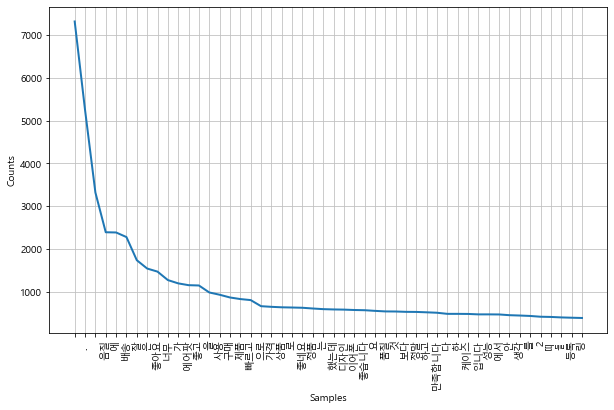

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
plt.figure(figsize=(10, 6))
ko.plot(50)
plt.show()

음질, 배송, 디자인, 이어폰, 품질이라는 단어가 상위에 분포되어있음. 음질,디자인은 성능변화가 없는 부분

## main

In [21]:
#리뷰하나씩 형태소 추출
a= len(review_)
token_review_list=[]
for i in range(0,a): # 리뷰하나당 처리하기위해 for문 
    token_review=t.morphs(review_[i])  #t=형태소분석기. morphs=형태소 추출.review_=전처리한 리뷰.
    token_review_str=(' '.join(token_review))  #,로 나누어져있는 형태소를 하나의 str로 묶기(df에 넣기위해서)
    
    #df['token_reivew'] = token_review_str  #이렇게하면 열전체값이 통일됨
    token_review_list.append(token_review_str) #하나의 리스트를 만들어서 df에 추가해야함.
    
df['token_review']=token_review_list #형태소단위로 나누어진 리뷰저장

In [52]:
token_review

['지인',
 '선물',
 '로',
 '드렸는데',
 '굉장히',
 '만족하고',
 '있습니다',
 '사',
 '용도',
 '도',
 '굉장히',
 '좋고',
 '휴대',
 '가',
 '간편하고',
 '무엇',
 '보다',
 '저렴하게',
 '구매',
 '할수',
 '있어서',
 '좋았네요',
 '다른',
 '분들',
 '에게도',
 '추천',
 '해주고',
 '싶습니다',
 '이만',
 '끝']

In [69]:
len(token_review_list)

5560

In [83]:
df

,Unnamed: 0,type,category,review,star,token_review
0,1,에어팟 1세대,음질,2세대로 배송 받았고 철가루랑 하얀색 실리콘케이스도 잘 받았습니다 역시 사용해보니 ...,5,2 세대 로 배송 받았고 철 가루 랑 하얀색 실리콘 케이스 도 잘 받았습니다 역시 ...
1,2,에어팟 1세대,음질,"배송은 4시 이전 주문 당일 발송으로 다음날 바로 받았구요, 바로 정품 등록했는데 ...",5,배송 은 4시 이전 주문 당일 발송 으로 다음 날 바로 받았구요 바로 정품 등록 했...
2,3,에어팟 1세대,음질,아이폰과 아이패드를 둘 다 사용하고 있는데 아이폰에서 음악을 듣거나 영상을 보다 아...,5,아이폰 과 아이패드 를 둘 다 사용 하고 있는데 아이폰 에서 음악 을 듣거나 영상 ...
3,4,에어팟 1세대,음질,다른 저렴한 곳도 있었습니다.\n\n그래도 제조일자 최신에 페이백으로 다시 받는 금...,4,다른 저렴한 곳도 있었습니다 \n\n 그래도 제조 일자 최신 에 페이 백 으로 다시...
4,5,에어팟 1세대,음질,택배도 하루일찍오고 하자 하나도 없고 깔끔했어요 뽁뽁이로 포장도 해주셔서 너무 감사...,5,택배 도 하루 일찍 오고 하자 하나 도 없고 깔끔했어요 뽁뽁이 로 포장 도 해주셔서...
...,...,...,...,...,...,...
5555,5556,에어팟 2세대(유선),휴대성,진작 살껄 휴대성부터 음질 모든게 너무 만족스러워요!!,5,진작 살껄 휴대 성 부터 음질 모든 게 너무 만족스러워요
5556,5557,에어팟 2세대(유선),휴대성,"무선인게 너무 ？？아요.. 휴대 간편하고, 이게 정말 활용적인가 고민하고 삿네요.....",5,무선 인게 너무 아요 휴대 간편하고 이 게 정말 활용 적 인가 고민 하고 삿네 요 ...
5557,5558,에어팟 2세대(유선),휴대성,선이라서 휴대하기 좋구요..귀에 꼽히는거라...아무래도 뛰거나 빨리움직이면 빠지기도...,5,선 이라서 휴대 하기 좋구요 귀 에 꼽히는거라 아무래도 뛰거나 빨리 움직이면 빠지 ...
5558,5559,에어팟 2세대(유선),휴대성,음질도 블루투스로 연결된거라고는 믿기지 않을정도로 너무 이쁘고 한손에 착 감겨서 휴...,5,음질 도 블루투스 로 연결 된거 라고는 믿기지 않을 정도 로 너무 이쁘고 한 손 에...
